# Simple Celsius to Fahrenheit Conversion with Linear Regression

This notebook provides a straightforward implementation of a linear regression model to learn the Celsius to Fahrenheit conversion formula: F = (9/5) * C + 32

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pathlib

In [2]:
# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

## 1. Load and Prepare Data

In [3]:
# Get the notebook path
notebook_path = pathlib.Path.cwd()

# Target directory (Project Root)
target_dir = 'ai_practice'
project_root = ''

# Iterate over the notebook_path until we find the target directory
for parent in notebook_path.parents:
    if parent.name == target_dir:
        project_root = parent
        break
        
dataset_dir = 'domnic_celsius_to_fahrenheit/celsius.csv'
csv_path = project_root / 'assets/files' / dataset_dir

# Load the dataset
df = pd.read_csv(csv_path, sep=',')
df.head()

,Celsius,Fahrenheit
0,1169,2136.2
1,1280,2336.0
2,2380,4316.0
3,1508,2746.4
4,2015,3659.0


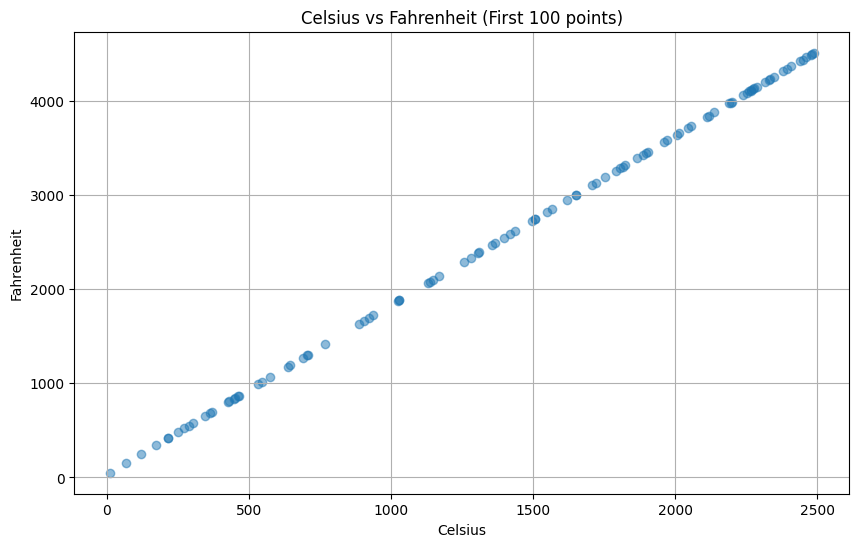

In [4]:
# Extract features and target
celsius = df['Celsius'].values
fahrenheit = df['Fahrenheit'].values

# Visualize some data points
plt.figure(figsize=(10, 6))
plt.scatter(celsius[:100], fahrenheit[:100], alpha=0.5)
plt.title('Celsius vs Fahrenheit (First 100 points)')
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.grid(True)
plt.show()

## 2. Create a Simple Linear Model

We'll create a model with just one Dense layer (no activation function), which is equivalent to a linear regression.

In [ ]:
# Create a simple linear model
model = keras.Sequential([
    keras.layers.Dense(units=1, input_shape=[1])
])
# TONOTE: In a Sequential model, the first layer can serve as both the input layer and the first hidden layer. This is why we don't need to explicitly define an `Input` layer just like what do have done in other projects. However, when building a model using the "functional API", we have to explicitly define an `Input` layer to specify the input shape.

# Compile the model
model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

# Display model summary
model.summary()

/Users/sebastian/Improvement/ai/ai_practice/venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

## 3. Train the Model

In [6]:
# Train the model
history = model.fit(
    celsius,
    fahrenheit,
    epochs=500,
    verbose=1
)

Epoch 1/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - loss: 1594181.0000
Epoch 2/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - loss: 463713.2812
Epoch 3/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - loss: 88552.9297
Epoch 4/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - loss: 9432.4199 
Epoch 5/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - loss: 672.7820
Epoch 6/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - loss: 252.8023
Epoch 7/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - loss: 245.5325
Epoch 8/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 245.1709
Epoch 9/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: 244.7403
Epoch 10/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 244.1867
Epoch 11/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - loss: 243.4767
Epoch 12/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - loss: 242.5690
Epoch 13/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - loss: 241.4128
Epoch 14/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 443u

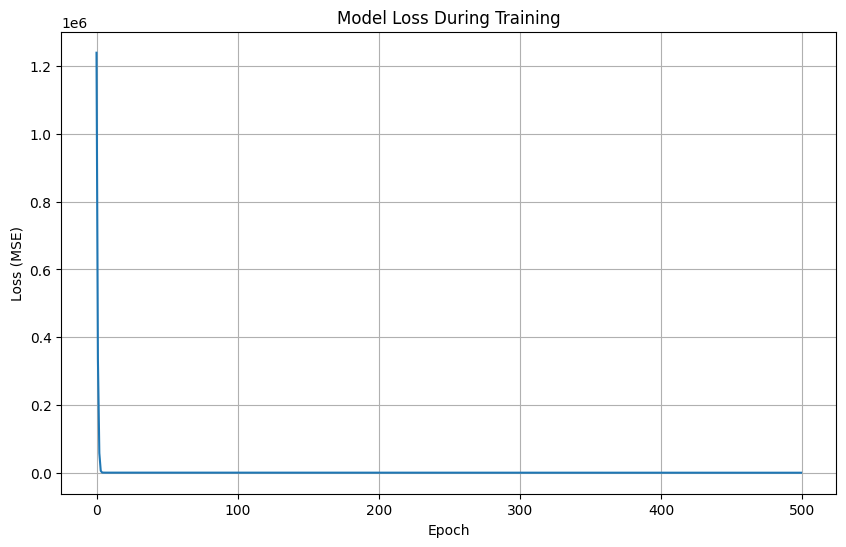

In [7]:
# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.grid(True)
plt.show()

## 4. Examine the Learned Parameters

After training, we can extract the weight (slope) and bias (intercept) that our model learned.

In [8]:
# Get the learned parameters
weight = model.layers[0].get_weights()[0][0][0]
bias = model.layers[0].get_weights()[1][0]

print(f"Learned Parameters:")
print(f"Weight (slope): {weight:.6f}")
print(f"Bias (intercept): {bias:.6f}")
print("\nExpected Parameters:")
print(f"Weight (slope): {9/5:.6f} (9/5)")
print(f"Bias (intercept): 32.0 (32)")
print("\nPercentage Error:")
print(f"Weight Error: {abs(weight - 9/5)/(9/5) * 100:.4f}%")
print(f"Bias Error: {abs(bias - 32)/32 * 100:.4f}%")

Learned Parameters:
Weight (slope): 1.800000
Bias (intercept): 31.999947

Expected Parameters:
Weight (slope): 1.800000 (9/5)
Bias (intercept): 32.0 (32)

Percentage Error:
Weight Error: 0.0000%
Bias Error: 0.0002%


## 5. Visualize Model Predictions vs Actual Formula

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


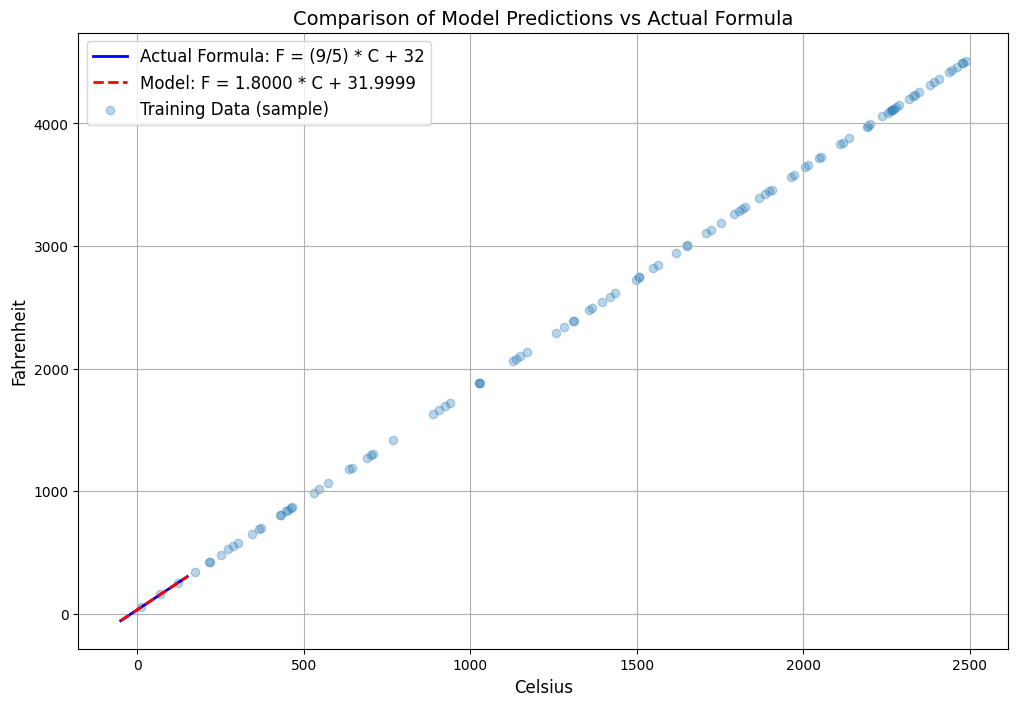

In [9]:
# Generate a range of Celsius temperatures
celsius_range = np.linspace(-50, 150, 200)

# Calculate Fahrenheit using the learned model
predicted_fahrenheit = model.predict(celsius_range).flatten()

# Calculate Fahrenheit using the actual formula: F = (9/5) * C + 32
actual_fahrenheit = (9/5) * celsius_range + 32

# Plot comparison
plt.figure(figsize=(12, 8))

# Plot both lines
plt.plot(celsius_range, actual_fahrenheit, 'b-', linewidth=2, label='Actual Formula: F = (9/5) * C + 32')
plt.plot(celsius_range, predicted_fahrenheit, 'r--', linewidth=2, label=f'Model: F = {weight:.4f} * C + {bias:.4f}')

# Add a sample of the training data
plt.scatter(celsius[:100], fahrenheit[:100], alpha=0.3, label='Training Data (sample)')

plt.title('Comparison of Model Predictions vs Actual Formula', fontsize=14)
plt.xlabel('Celsius', fontsize=12)
plt.ylabel('Fahrenheit', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

## 6. Test with Specific Values

In [10]:
# Test with some specific Celsius values
test_celsius = np.array([-40, -10, 0, 10, 25, 100])

# Predictions from our model
predictions = model.predict(test_celsius).flatten()

# Actual values
actual = (9/5) * test_celsius + 32

# Print results
print("Test Results:")
print("-" * 60)
print(f"{'Celsius':^10} | {'Prediction':^15} | {'Actual':^15} | {'Difference':^15}")
print("-" * 60)

for c, p, a in zip(test_celsius, predictions, actual):
    print(f"{c:^10.1f} | {p:^15.2f} | {a:^15.2f} | {abs(p-a):^15.4f}")

print("-" * 60)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Test Results:
------------------------------------------------------------
 Celsius   |   Prediction    |     Actual      |   Difference   
------------------------------------------------------------
  -40.0    |     -40.00      |     -40.00      |     0.0001     
  -10.0    |      14.00      |      14.00      |     0.0001     
   0.0     |      32.00      |      32.00      |     0.0001     
   10.0    |      50.00      |      50.00      |     0.0001     
   25.0    |      77.00      |      77.00      |     0.0001     
  100.0    |     212.00      |     212.00      |     0.0001     
------------------------------------------------------------
